conda install pandas numpy matplotlib seaborn requests bs4

In [4]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
import seaborn as sns

# To extract and parse fundamental data from finviz website
import requests
from bs4 import BeautifulSoup as bs

# For parsing financial statements data from financialmodelingprep api
from urllib.request import urlopen
import json
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

# Financialmodelingprep api url
base_url = "https://financialmodelingprep.com/api/v3/"

In [48]:
apiKey = 'a2fade86926c0fd50df3ebc5c2159a76'

In [319]:
type = {'value': [2,4], 'growth': [1.5,8]}
ticker = "SQ"
type = type['growth']

In [320]:
q_cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_cash_flow_statement = q_cash_flow_statement.set_index('date').iloc[:4] # extract for last 4 quarters
q_cash_flow_statement = q_cash_flow_statement.apply(pd.to_numeric, errors='coerce')

q_cash_flow_statement.iloc[:,4:].head()

,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,NaN,293959000,"22,471,000","-4,641,000",113671000,-155228000,-189222000,0,"88,657,000",-75916000,...,0,0,"1,041,797,000",3201863000,2160066000,120726000,-52049000,68677000,NaN,NaN
2020-09-30,NaN,36515000,"20,624,000","-2,351,000",110416000,111005000,17454000,0,"-28,426,000",2665559000,...,"-2,606,000",0,"153,858,000",2160066000,2006208000,412710000,-29792000,382918000,NaN,NaN
2020-06-30,NaN,-11478000,"21,056,000","-40,000",96410000,169237000,-362351000,0,"89,981,000",2554554000,...,0,0,"-3,709,000",2006208000,2009917000,-273129000,-30424000,-303553000,NaN,NaN
2020-03-31,NaN,-105891000,"20,061,000","-984,000",77303000,859601000,60248000,0,"-6,684,000",2385317000,...,0,0,"911,211,000",2009917000,1098706000,121296000,-26137000,95159000,NaN,NaN


In [321]:

cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?apikey=' + apiKey))
cash_flow_statement = cash_flow_statement.set_index('date')
cash_flow_statement = cash_flow_statement.apply(pd.to_numeric, errors='coerce')
    
cash_flow_statement.iloc[:,4:].head()

,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,NaN,213105000,84212000,"-8,016,000",397800000,"-9,173,000",-473871000,0,"143,528,000",-260432000,...,0,0,"2,103,157,000",3201863000,1098706000,381603000,-138402000,"243,201,000",NaN,NaN
2019-12-31,NaN,375446000,75598000,"-1,376,000",297863000,"432,352,000",-248271000,0,"41,697,000",1525716000,...,0,0,"465,859,000",1098706000,632847000,465699000,-62498000,"403,201,000",NaN,NaN
2018-12-31,NaN,-38453000,60961000,"-646,000",216881000,"287,897,000",245795000,0,"-60,651,000",1093364000,...,0,0,"-102,234,000",632847000,735081000,295080000,-62787000,"232,293,000",NaN,NaN
2017-12-31,NaN,-62813000,37279000,"-1,385,000",155836000,"381,506,000",-305831000,0,"68,152,000",805467000,...,0,0,"246,336,000",735081000,488745000,127711000,-26097000,"101,614,000",NaN,NaN
2016-12-31,NaN,-171590000,37745000,"58,000",138786000,"7,552,000",-178405000,0,"-2,147,000",423961000,...,0,0,"-9,299,000",452030000,461329000,23131000,-25833000,"-2,702,000",NaN,NaN


In [322]:
ttm_cash_flow_statement = q_cash_flow_statement.sum() # sum up last 4 quarters to get TTM cash flow
cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)
final_cash_flow_statement = cash_flow_statement[::-1] # reverse list to show most recent ones first
final_cash_flow_statement.iloc[:,4:].head()

,period,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
TTM,0,"84,212,000","-8,016,000","397,800,000","984,615,000","-473,871,000",0,"143,528,000","7,529,514,000","-7,679,000",...,"-2,606,000",0,"2,103,157,000","9,378,054,000","7,274,897,000","381,603,000","-138,402,000","243,201,000",0,0
2020-12-31,NaN,"84,212,000","-8,016,000","397,800,000","-9,173,000","-473,871,000",0,"143,528,000","-260,432,000","-7,679,000",...,0,0,"2,103,157,000","3,201,863,000","1,098,706,000","381,603,000","-138,402,000","243,201,000",NaN,NaN
2019-12-31,NaN,"75,598,000","-1,376,000","297,863,000","432,352,000","-248,271,000",0,"41,697,000","1,525,716,000","-34,882,000",...,0,0,"465,859,000","1,098,706,000","632,847,000","465,699,000","-62,498,000","403,201,000",NaN,NaN
2018-12-31,NaN,"60,961,000","-646,000","216,881,000","287,897,000","245,795,000",0,"-60,651,000","1,093,364,000","-366,000",...,0,0,"-102,234,000","632,847,000","735,081,000","295,080,000","-62,787,000","232,293,000",NaN,NaN
2017-12-31,NaN,"37,279,000","-1,385,000","155,836,000","381,506,000","-305,831,000",0,"68,152,000","805,467,000","-24,895,000",...,0,0,"246,336,000","735,081,000","488,745,000","127,711,000","-26,097,000","101,614,000",NaN,NaN


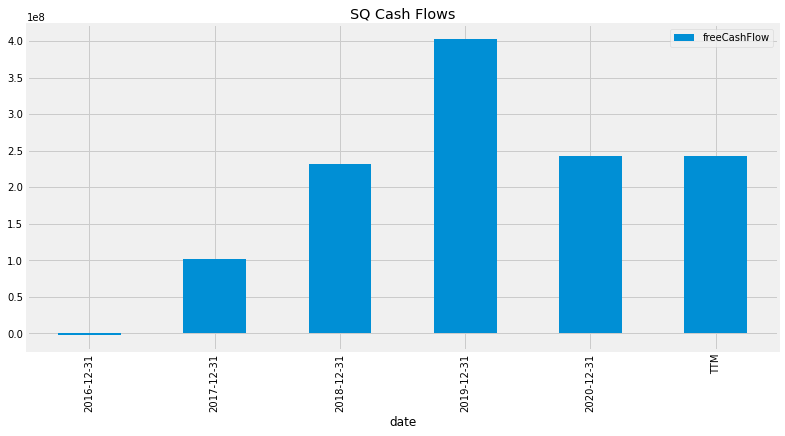

In [323]:
final_cash_flow_statement[['freeCashFlow']].iloc[::-1].iloc[-15:].plot(kind='bar', title=ticker + ' Cash Flows')
plt.show()

In [324]:
q_balance_statement = pd.DataFrame(get_jsonparsed_data(base_url+'balance-sheet-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_balance_statement = q_balance_statement.set_index('date')
q_balance_statement = q_balance_statement.apply(pd.to_numeric, errors='coerce')
q_balance_statement.iloc[:,4:].head()

,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,NaN,3158058000,2732944000,5891002000,1215461000,61129000,66814000,7761629000,690408000,316701000,...,-297223000,"23,000,000",0,2681569000,9869550000,0,3051018000,-107040000,NaN,NaN
2020-09-30,NaN,2118808000,2613397000,4732205000,1033419000,70422000,78065000,6491270000,646120000,300620000,...,-591182000,"12,000,000","2,050,925,000",2062835000,8114276000,"762,434,000",2232107000,113299000,NaN,NaN
2020-06-30,NaN,1972762000,2447455000,4420217000,1032333000,55422000,62169000,6187070000,616507000,295759000,...,-627697000,"4,000,000",0,1926307000,7812272000,0,2226192000,253430000,NaN,NaN
2020-03-31,NaN,1962316000,1466651000,3428967000,637189000,54719000,42643000,4389975000,564117000,288533000,...,-616219000,"-3,000,000",0,1807945000,6003873000,0,3227498000,1265182000,NaN,NaN
2019-12-31,NaN,1047118000,1168748000,2215866000,689836000,47683000,39951000,3219801000,262342000,266345000,...,-510328000,"2,000,000",0,1715050000,4551258000,0,2107580000,1060462000,NaN,NaN


In [325]:

cash_flow = final_cash_flow_statement.iloc[0]['freeCashFlow']
total_debt = q_balance_statement.iloc[0]['totalDebt'] 
cash_and_ST_investments = q_balance_statement.iloc[0]['cashAndCashEquivalents'] + q_balance_statement.iloc[0]['shortTermInvestments']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

Free Cash Flow:  243201000.0
Total Debt:  3051018000.0
Cash and ST Investments:  5891002000.0


In [326]:
# List of data we want to extract from Finviz Table
metric = ['Price', 'EPS next 5Y', 'EPS past 5Y','Beta', 'Shs Outstand']

def fundamental_metric(soup, metric):
    # the table which stores the data in Finviz has html table attribute class of 'snapshot-td2'
    return soup.find(text = metric).find_next(class_='snapshot-td2').text
   
def get_finviz_data(ticker):
    try:
        url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())
        soup = bs(requests.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}).content)
        dict_finviz = {}        
        for m in metric:   
            dict_finviz[m] = fundamental_metric(soup,m)
        for key, value in dict_finviz.items():
            # replace percentages
            if (value[-1]=='%'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])
            # billion
            if (value[-1]=='B'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000000  
            # million
            if (value[-1]=='M'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000
            try:
                dict_finviz[key] = float(dict_finviz[key])
            except:
                pass 
    except Exception as e:
        print (e)
        print ('Not successful parsing ' + ticker + ' data.')        
    return dict_finviz

finviz_data = get_finviz_data(ticker)
if finviz_data['Beta'] == '-':
    finviz_data['Beta'] = 1
finviz_data

{'Price': 216.44,
 'EPS next 5Y': 51.52,
 'EPS past 5Y': 22.0,
 'Beta': 2.6,
 'Shs Outstand': 452940000.0}

In [327]:
Beta = finviz_data['Beta']

discount_rate = 7
if(Beta<0.80):
    discount_rate = 5
elif(Beta>=0.80 and Beta<1):
    discount_rate = 6
elif(Beta>=1 and Beta<1.1):
    discount_rate = 6.5
elif(Beta>=1.1 and Beta<1.2):
    discount_rate = 7
elif(Beta>=1.2 and Beta<1.3):
    discount_rate =7.5
elif(Beta>=1.3 and Beta<1.4):
    discount_rate = 8
elif(Beta>=1.4 and Beta<1.6):
    discount_rate = 8.5
elif(Beta>=1.61):
    discount_rate = 9   

print("Discount Rate: ", discount_rate)
discount_rate = 9

Discount Rate:  9


In [328]:
EPS_growth_5Y = finviz_data['EPS next 5Y']
EPS_growth_6Y_to_10Y = EPS_growth_5Y/finviz_data['EPS past 5Y']*EPS_growth_5Y 
EPS_growth_11Y_to_20Y  = np.minimum(EPS_growth_6Y_to_10Y, 4)  # Slightly higher than long term inflation rate, conservative estimate

shares_outstanding = finviz_data['Shs Outstand']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

print("EPS Growth 5Y: ", EPS_growth_5Y)
print("EPS Growth 6Y to 10Y: ", EPS_growth_6Y_to_10Y)
print("EPS Growth 11Y to 20Y: ", EPS_growth_11Y_to_20Y)

print("Discount Rate: ", discount_rate)

print("Shares Outstanding: ", shares_outstanding)

Free Cash Flow:  243201000.0
Total Debt:  3051018000.0
Cash and ST Investments:  5891002000.0
EPS Growth 5Y:  51.52
EPS Growth 6Y to 10Y:  120.65047272727273
EPS Growth 11Y to 20Y:  4.0
Discount Rate:  9
Shares Outstanding:  452940000.0


Discounted Cash Flows

Year 1: $338071702.01834863
Year 2: $469950681.5579834
Year 3: $653274562.1070242
Year 4: $908111574.7748284
Year 5: $1262358401.9255233
Year 6: $2555412643.4505615
Year 7: $5172963374.225835
Year 8: $10471713889.209158
Year 9: $21198060733.199524
Year 10: $42911579097.99919
Year 11: $40943158038.45795
Year 12: $39065031522.93234
Year 13: $37273057599.86205
Year 14: $35563284315.46471
Year 15: $33931940998.241554
Year 16: $32375429943.276344
Year 17: $30890318477.988438
Year 18: $29473331391.842175
Year 19: $28121343713.317303
Year 20: $26831373818.211006


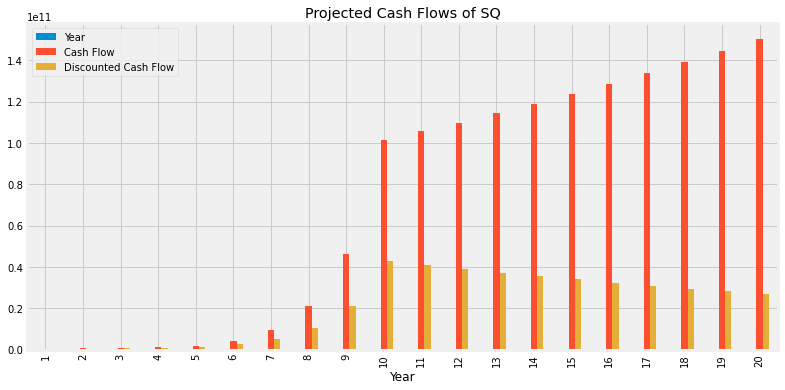

In [329]:
def calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate):   
    
    # Convert all percentages to decmials
    EPS_growth_5Y_d = EPS_growth_5Y/100
    EPS_growth_6Y_to_10Y_d = EPS_growth_6Y_to_10Y/100
    EPS_growth_11Y_to_20Y_d = EPS_growth_11Y_to_20Y/100
    discount_rate_d = discount_rate/100
    print("Discounted Cash Flows\n")
    
    # Lists of projected cash flows from year 1 to year 20
    cash_flow_list = []
    cash_flow_discounted_list = []
    year_list = []
    
    
    # Years 1 to 5
    for year in range(1, 6):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_5Y_d)        
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 6 to 10
    for year in range(6, 11):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_6Y_to_10Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 11 to 20
    for year in range(11, 21):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_11Y_to_20Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    intrinsic_value = (sum(cash_flow_discounted_list) + total_debt + cash_and_ST_investments)/shares_outstanding
    df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': cash_flow_discounted_list})
    df.index = df.Year
    df.plot(kind='bar', title = 'Projected Cash Flows of ' + ticker)
    plt.show()

    return intrinsic_value


intrinsic_value = calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate) 

In [330]:
print("Ticker: ", ticker)
print("Intrinsic Value: ", intrinsic_value)
current_price = finviz_data['Price']
print("Current Price: ", current_price)
print("Margin of Safety: ", (1-current_price/intrinsic_value)*100)   

Ticker:  SQ
Intrinsic Value:  947.9219907273853
Current Price:  216.44
Margin of Safety:  77.16689747497941
